## Machine Learning - Lista 2
### Aluno: Douglas Gaspar Feitosa Freitas
### Matrícula: 473552

## Questão 1

Considere o conjunto de dados disponível em **breastcancer.csv**, organizado em 31 colunas, sendo as 30 primeiras colunas os atributos e a última coluna a saída. Os 30 atributos coletados de exames médicos são usados no diagnóstico do câncer de mama, sendo 1 a classe positiva e 0 a classe negativa. Maiores detalhes sobre os dados podem ser conferidos em *https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset*.

a) Considerando uma validação cruzada em 10 *folds*, avalie modelos de classificação binária nos dados em questão. Para tanto, use as abordagens abaixo:
- **Regressão Logística** (treinado com GD ou SGD);
- **Análise do Discriminante Gaussiano**;
- **Naive Bayes Gaussiano**;

b) Para cada modelo criado, reporte valor médio e desvio padrão da **acurácia global** e da **acurácia por classe**.

In [108]:
## Setup Básico ##
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import random as random

def mse(y, pred):
    return np.mean((y - pred) ** 2)

def rmse(y, pred):
    return (mse(y, pred) ** 0.5)

def dsNormalize(x):
    return (x - np.mean(x, axis = 0)) / np.std(x, axis = 0)

def dsDeNormalize(x):
    return x * np.std(x, axis = 0) + np.mean(x, axis = 0)

def prepareX(x):
    return np.append(np.ones((x.shape[0], 1)), dsNormalize(x), axis=1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary(x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i, j] >= 0.5:
                x[i, j] = 1
            else:
                x[i, j] = 0
    return x

def accuracy(data, pred):
    total = 0
    correct = 0
    for i in range(data.shape[0]):
        if data[i] == pred[i]:
            correct = correct + 1
        total = total + 1
    return correct/total

### Regressão Logística

Local µ[0]: 0.19642857142857142   | STD: 0.39729634752298193
Local µ[1]: 0.5892857142857143   | STD: 0.4919634754984254
Local µ[2]: 0.6428571428571429   | STD: 0.4791574237499549
Local µ[3]: 0.48214285714285715   | STD: 0.49968102070118653
Local µ[4]: 0.5535714285714286   | STD: 0.49712181810982337
Local µ[5]: 0.7678571428571429   | STD: 0.4221996577691746
Local µ[6]: 0.7142857142857143   | STD: 0.45175395145262565
Local µ[7]: 0.7678571428571429   | STD: 0.4221996577691746
Local µ[8]: 0.7678571428571429   | STD: 0.4221996577691746
Local µ[9]: 0.8392857142857143   | STD: 0.36726721073577023
Global µ: 0.6321428571428572   | STD: 0.18038366141677703


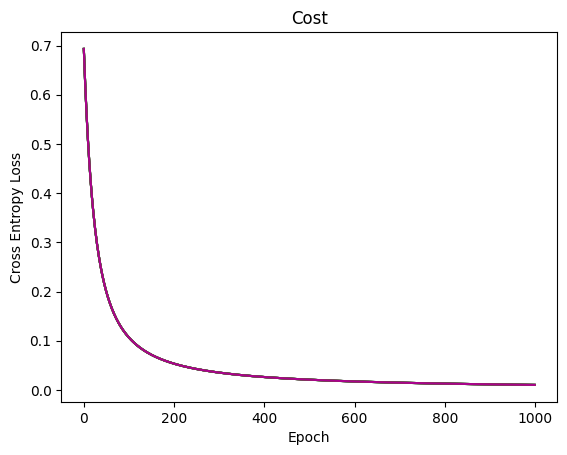

In [118]:
breast_cancer = np.genfromtxt('./breastcancer.csv', delimiter=',')

# xRaw = breast_cancer[:, [0]]
xRaw = breast_cancer[:,:-1]
yRaw = breast_cancer[:,-1]

#print("xRaw:", xRaw.shape, "| yRaw:", yRaw.shape)

#X = prepareX(xRaw)
#y = dsNormalize(yRaw)
X = xRaw
y = yRaw

def choose_color():
    r = random.random() 
    b = random.random() 
    g = random.random()   
    color = (r, g, b)
    return color

def graph_plot(results, count=-1, nameY="MSE"):
    #plt.figure()                                 #remova esse comment para gerar gráficos separados
    if count == -1: plt.title("Cost")
    else: 
        title = "Cost " + str(count)
        plt.title(title)
    plt.plot(results[0], color=choose_color())
    plt.xlabel("Epoch")
    plt.ylabel(nameY)
    plt.grid(which='major', axis='both')

#####################

def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Define the number of folds (K)
k = 10

# Get the fold indices
fold_indices = kfold_indices(X, k)

############################

def logistic_regression(X, y, alpha=0.1, epoch=1000):
    w = np.zeros((X.shape[1],1))                                                              #inicializa os parâmetros em 0
    N = X.shape[0]
    cross_history = [] 

    for _ in range(epoch):                                                                    #enquanto estiver na epoch
        pred = sigmoid(X @ w)                                                                 #passa X na sigmoid
        error = y - pred                                                                      #calcula o erro
        w = w + alpha * (X.T @ error) / N                                                     #calcula w (slide regressão logística pag. 23)

        cross_history.append((-1) * (np.mean(y * np.log(pred) + (1 - y)*np.log(1 - pred))))           #calcula e adiciona ao histórico o Cross Entropy Loss
        
    return cross_history, w

#results = logistic_regression(X, y)
#graph_plot(results, nameY = "Cross Entropy Loss")
#########################################################

count = 0
k_results = [0] * k
total_score = [0] * k
total_acc = [0] * k

for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    y_train = y_train
    y_test = y_test.reshape((-1,1))

    X_train = prepareX(X_train)
    X_test = prepareX(X_test)
    
    results = logistic_regression(X_train, y_train)
    graph_plot(results, -1, "Cross Entropy Loss")
    
    k_results[count] = results
    w_res = results[1]
    pred_res = X_test @ w_res
    #mse_res = mse(y_test, pred_res)
    score = y_test - pred_res
    total_score[count] = score
    #print("X_test:", X_test, "w_res:", w_res)
    acc = accuracy(y_test, pred)
    total_acc[count] = acc
    print("Local µ[",count,"]: ", acc, "   | STD: ", np.std(y_test - pred), sep='')
    count = count + 1
    
    
print("Global µ: ", np.mean(total_acc), "   | STD: ", np.std(total_acc), sep='')




### Análise do Discriminante Gaussiano

In [111]:
breast_cancer = np.genfromtxt('./breastcancer.csv', delimiter=',')

xRaw = breast_cancer[:,:-1]
yRaw = breast_cancer[:,-1]

X = xRaw
y = yRaw

def gaussian_discriminant_analysis(X, y):
    n_classes = (np.max(y) + 1).astype(np.int64)
    n_features = X.shape[1]
    means = np.zeros((n_classes, n_features))
    covs = np.zeros((n_classes, n_features, n_features))
    priors = np.zeros(n_classes)
    
    for k in range(n_classes):
        X_k = X[y == k]
        means[k] = np.mean(X_k, axis=0)
        covs[k] = np.cov(X_k.T)
        priors[k] = np.mean(y == k)
    
    return means, covs, priors

def classify(X, means, covs, priors):
    n_classes = means.shape[0]
    n_samples = X.shape[0]
    probs = np.zeros((n_samples, n_classes))
    
    for k in range(n_classes):
        for i in range(n_samples):
            x = X[i]
            prob = (1/np.sqrt(2*np.pi)**len(x)) * (1/np.linalg.det(covs[k])) * np.exp(-0.5 * np.sum((x-means[k]).T @ np.linalg.inv(covs[k]) @ (x-means[k]))) * priors[k]
            probs[i, k] = prob
    
    return np.argmax(probs, axis=1)

#####################################

count = 0
k_results = [0] * k
total_acc = [0] * k

fold_indices = kfold_indices(X, k)
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    means, covs, priors = gaussian_discriminant_analysis(X_train, y_train)
    pred = classify(X_test, means, covs, priors)
    acc = accuracy(y_test, pred)
    total_acc[count] = acc
    
    print("Local µ[",count,"]: ", acc, "   | STD: ", np.std(y_test - pred), sep='')
    
    count = count + 1

print("Global µ: ", np.sum(total_acc)/k, "   | STD: ", np.std(total_acc), sep='')

#################################



Local µ[0]: 0.9464285714285714   | STD: 0.2251700038021159
Local µ[1]: 0.9107142857142857   | STD: 0.29396567202061297
Local µ[2]: 0.9642857142857143   | STD: 0.1855768722395226
Local µ[3]: 0.9285714285714286   | STD: 0.26486423168198797
Local µ[4]: 0.9642857142857143   | STD: 0.18557687223952257
Local µ[5]: 0.9642857142857143   | STD: 0.1889822365046136
Local µ[6]: 0.9821428571428571   | STD: 0.13243211584099399
Local µ[7]: 0.9821428571428571   | STD: 0.13243211584099399
Local µ[8]: 0.9642857142857143   | STD: 0.1855768722395226
Local µ[9]: 0.9642857142857143   | STD: 0.1855768722395226
Global µ: 0.957142857142857   | STD: 0.021428571428571422


### Naive Bayes Gaussiano

In [114]:
breast_cancer = np.genfromtxt('./breastcancer.csv', delimiter=',')

xRaw = breast_cancer[:,:-1]
yRaw = breast_cancer[:,-1]

X = xRaw
y = yRaw

def gaussian_naive_bayes(X, y):
    n_classes = (np.max(y) + 1).astype(np.int64)
    n_features = X.shape[1]
    means = np.zeros((n_classes, n_features))
    variables = np.zeros((n_classes, n_features))
    priors = np.zeros(n_classes)
    
    for k in range(n_classes):
        X_k = X[y == k]
        means[k] = np.mean(X_k, axis=0)
        variables[k] = np.var(X_k, axis=0)
        priors[k] = np.mean(y == k)
    
    return means, variables, priors

def classify(X, means, variables, priors):
    n_classes = means.shape[0]
    n_samples = X.shape[0]
    probs = np.zeros((n_samples, n_classes))
    
    for k in range(n_classes):
        for i in range(n_samples):
            x = X[i]
            prob = np.prod((1/np.sqrt(2*np.pi*variables[k])) * np.exp(-0.5 * (x-means[k])**2 / variables[k])) * priors[k]
            probs[i, k] = prob
    
    return np.argmax(probs, axis=1)

#####################################

count = 0
k_results = [0] * k
total_acc = [0] * k

fold_indices = kfold_indices(X, k)
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    means, variables, priors = gaussian_naive_bayes(X_train, y_train)
    pred = classify(X_test, means, variables, priors)
    acc = accuracy(y_test, pred)
    total_acc[count] = acc
    
    print("Local µ[",count,"]: ", acc, "   | STD: ", np.std(y_test - pred), sep='')
    
    count = count + 1

print("Global µ: ", np.sum(total_acc)/k, "   | STD: ", np.std(total_acc), sep='')

#################################

Local µ[0]: 0.9107142857142857   | STD: 0.2851557039762734
Local µ[1]: 0.8571428571428571   | STD: 0.37627334831616926
Local µ[2]: 0.875   | STD: 0.3494711748353737
Local µ[3]: 0.9285714285714286   | STD: 0.25753937681885636
Local µ[4]: 0.9464285714285714   | STD: 0.23076514255928723
Local µ[5]: 0.9464285714285714   | STD: 0.23076514255928723
Local µ[6]: 0.9821428571428571   | STD: 0.13243211584099399
Local µ[7]: 0.9642857142857143   | STD: 0.1889822365046136
Local µ[8]: 0.9285714285714286   | STD: 0.25753937681885636
Local µ[9]: 0.9285714285714286   | STD: 0.2672612419124244
Global µ: 0.9267857142857142   | STD: 0.03611383645742265


## Questão 2
Considere o conjunto de dados disponível em **vehicle.csv**, organizado em 19 colunas, sendo as 18 primeiras colunas os atributos e a última coluna a saída. Os 18 atributos caracterizam a silhueta de veículos, extraídos pelo método HIPS (Hierarchical Image Processing System). A tarefa consiste em classificar o veículo em 4 classes (bus, opel, saab, e van). Maiores detalhes sobre os dados podem
ser conferidos em *https://www.openml.org/search?type=data&sort=runs&id=54*.

a) Considerando uma validação cruzada em 10 folds, avalie modelos de classificação multiclasse nos dados em questão. Para tanto, use as abordagens abaixo:
- **Regressão Softmax** (treinado com GD ou SGD);
- **Análise do Discriminante Gaussiano**;
- **Naive Bayes Gaussiano**;
 
b) Para cada modelo criado, reporte valor médio e desvio padrão da **acurácia global** e da **acurácia por classe**.

### Regressão Softmax

In [117]:
vehicle = np.genfromtxt('./vehicle.csv', delimiter=',')

xRaw = vehicle[:,:-1]
yRaw = vehicle[:,-1]

X = xRaw
y = yRaw

def softmax_regression(X, y):
    n_classes = (np.max(y) + 1).astype(np.int64)
    n_features = X.shape[1]
    weights = np.zeros((n_features, n_classes))
    
    y_onehot = np.eye(n_classes)[y.astype(int)]
    
    for _ in range(1000):
        y_pred = softmax(np.dot(X, weights))
        dw = np.dot(X.T, (y_pred - y_onehot))
        weights -= 0.01 * dw
    
    return weights
    
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def classify(X, weights):
    y_pred = softmax(np.dot(X, weights))
    return np.argmax(y_pred, axis=1)

#####################################

count = 0
k_results = [0] * k
total_acc = [0] * k

fold_indices = kfold_indices(X, k)
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    weights = softmax_regression(X_train, y_train)
    pred = classify(X_test, weights)
    acc = accuracy(y_test, pred)
    total_acc[count] = acc
    
    print("Local µ[",count,"]: ", acc, "   | STD: ", np.std(y_test - pred), sep='')
    
    count = count + 1

print("Global µ: ", np.sum(total_acc)/k, "   | STD: ", np.std(total_acc), sep='')

#################################

C:\Users\agar32\AppData\Local\Temp\ipykernel_69104\283801841.py:24: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
C:\Users\agar32\AppData\Local\Temp\ipykernel_69104\283801841.py:24: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)


Local µ[0]: 0.27380952380952384   | STD: 1.1796531832081247
Local µ[1]: 0.23809523809523808   | STD: 1.1368891796488878
Local µ[2]: 0.32142857142857145   | STD: 1.1478067422089475
Local µ[3]: 0.32142857142857145   | STD: 1.1678808065172115
Local µ[4]: 0.2857142857142857   | STD: 1.0837911120705754
Local µ[5]: 0.21428571428571427   | STD: 1.0489034334477185
Local µ[6]: 0.19047619047619047   | STD: 1.0259529058779282
Local µ[7]: 0.20238095238095238   | STD: 1.0516022760239612
Local µ[8]: 0.2976190476190476   | STD: 1.1479919370484901
Local µ[9]: 0.25   | STD: 1.0850326807830937
Global µ: 0.2595238095238095   | STD: 0.0454256762579498


### Análise do Discriminante Gaussiano

In [119]:
vehicle = np.genfromtxt('./vehicle.csv', delimiter=',')

xRaw = vehicle[:,:-1]
yRaw = vehicle[:,-1]

X = xRaw
y = yRaw

def gaussian_discriminant_analysis(X, y):
    n_classes = (np.max(y) + 1).astype(np.int64)
    n_features = X.shape[1]
    means = np.zeros((n_classes, n_features))
    covs = np.zeros((n_classes, n_features, n_features))
    priors = np.zeros(n_classes)
    
    for k in range(n_classes):
        X_k = X[y == k]
        means[k] = np.mean(X_k, axis=0)
        covs[k] = np.cov(X_k.T)
        priors[k] = np.mean(y == k)
    
    return means, covs, priors

def classify(X, means, covs, priors):
    n_classes = means.shape[0]
    n_samples = X.shape[0]
    probs = np.zeros((n_samples, n_classes))
    
    for k in range(n_classes):
        for i in range(n_samples):
            x = X[i]
            prob = (1/np.sqrt(2*np.pi)**len(x)) * (1/np.linalg.det(covs[k])) * np.exp(-0.5 * np.sum((x-means[k]).T @ np.linalg.inv(covs[k]) @ (x-means[k]))) * priors[k]
            probs[i, k] = prob
    
    return np.argmax(probs, axis=1)

#####################################

count = 0
k_results = [0] * k
total_acc = [0] * k

fold_indices = kfold_indices(X, k)
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    means, covs, priors = gaussian_discriminant_analysis(X_train, y_train)
    pred = classify(X_test, means, covs, priors)
    acc = accuracy(y_test, pred)
    total_acc[count] = acc
    
    print("Local µ[",count,"]: ", acc, "   | STD: ", np.std(y_test - pred), sep='')
    
    count = count + 1

print("Global µ: ", np.sum(total_acc)/k, "   | STD: ", np.std(total_acc), sep='')

#################################

Local µ[0]: 0.8571428571428571   | STD: 0.5517442964884032
Local µ[1]: 0.8690476190476191   | STD: 0.5295946766556006
Local µ[2]: 0.7857142857142857   | STD: 0.5816301666812432
Local µ[3]: 0.8928571428571429   | STD: 0.32711027771509726
Local µ[4]: 0.8333333333333334   | STD: 0.5806546856312952
Local µ[5]: 0.8095238095238095   | STD: 0.5567306167185677
Local µ[6]: 0.8690476190476191   | STD: 0.3616775602610312
Local µ[7]: 0.8690476190476191   | STD: 0.44971016113152623
Local µ[8]: 0.8809523809523809   | STD: 0.3442102927333562
Local µ[9]: 0.8809523809523809   | STD: 0.39177339695010316
Global µ: 0.854761904761905   | STD: 0.03273268353539886


### Naive Bayes Gaussiano

In [120]:
vehicle = np.genfromtxt('./vehicle.csv', delimiter=',')

xRaw = vehicle[:,:-1]
yRaw = vehicle[:,-1]

X = xRaw
y = yRaw

def gaussian_naive_bayes(X, y):
    n_classes = (np.max(y) + 1).astype(np.int64)
    n_features = X.shape[1]
    means = np.zeros((n_classes, n_features))
    variables = np.zeros((n_classes, n_features))
    priors = np.zeros(n_classes)
    
    for k in range(n_classes):
        X_k = X[y == k]
        means[k] = np.mean(X_k, axis=0)
        variables[k] = np.var(X_k, axis=0)
        priors[k] = np.mean(y == k)
    
    return means, variables, priors

def classify(X, means, variables, priors):
    n_classes = means.shape[0]
    n_samples = X.shape[0]
    probs = np.zeros((n_samples, n_classes))
    
    for k in range(n_classes):
        for i in range(n_samples):
            x = X[i]
            prob = np.prod((1/np.sqrt(2*np.pi*variables[k])) * np.exp(-0.5 * (x-means[k])**2 / variables[k])) * priors[k]
            probs[i, k] = prob
    
    return np.argmax(probs, axis=1)

#####################################

count = 0
k_results = [0] * k
total_acc = [0] * k

fold_indices = kfold_indices(X, k)
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    means, variables, priors = gaussian_naive_bayes(X_train, y_train)
    pred = classify(X_test, means, variables, priors)
    acc = accuracy(y_test, pred)
    total_acc[count] = acc
    
    print("Local µ[",count,"]: ", acc, "   | STD: ", np.std(y_test - pred), sep='')
    
    count = count + 1

print("Global µ: ", np.sum(total_acc)/k, "   | STD: ", np.std(total_acc), sep='')

#################################

Local µ[0]: 0.4642857142857143   | STD: 1.4039040964461
Local µ[1]: 0.44047619047619047   | STD: 1.305404777321219
Local µ[2]: 0.4880952380952381   | STD: 1.226768241136164
Local µ[3]: 0.44047619047619047   | STD: 1.3343958351621001
Local µ[4]: 0.44047619047619047   | STD: 1.31981883935163
Local µ[5]: 0.5833333333333334   | STD: 1.189285118451636
Local µ[6]: 0.4523809523809524   | STD: 1.246764520151052
Local µ[7]: 0.4166666666666667   | STD: 1.2332207155790618
Local µ[8]: 0.44047619047619047   | STD: 1.2661653143150793
Local µ[9]: 0.47619047619047616   | STD: 1.388883219943079
Global µ: 0.4642857142857143   | STD: 0.0442242276690636


Eu tive que correr contra o relógio para terminar a tempo, desculpa não ter otimizado os algoritmos e ter copiado tanto código de uma parte pra outra, depois de ter tido tantos problemas por uma coisinha ou outra eu tive medo de quebrar algo se eu tentasse reutilizar o código de forma mais eficiente.